In [62]:
import numpy as np
import time
from scipy.stats import multivariate_normal

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from RGP import *

cs = [[x/256 for x in (8, 65, 92)], \
    [x/256 for x in (204, 41, 54)], \
    [x/256 for x in (118, 148, 159)], \
    [x/256 for x in (232, 197, 71)]] 

float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

print(str(np.array([1.23252323])))

[1.23]


In [63]:
step = 0.1
x_query = np.arange(-10, 10+step, step).reshape(-1,1)

theta0 = np.array([1.0,1.0,0.1]) # Kernel variables



# ----- The basis vectors -----
x_basis = np.arange(-5,6,2).reshape(-1,1)
y_basis = np.random.normal(0, 0, size=x_basis.shape)


model_prior = RGP(x_basis, y_basis, theta=theta0)

mean_prior, cov_prior = model_prior.predict(x_query, cov=True)
std_prior = np.diag(cov_prior)



/home/ja/Projects/RGP/RGP.py:62: RuntimeWarning: invalid value encountered in multiply
  cov_mat = np.empty((x1.shape[0], x2.shape[0]))*np.NaN


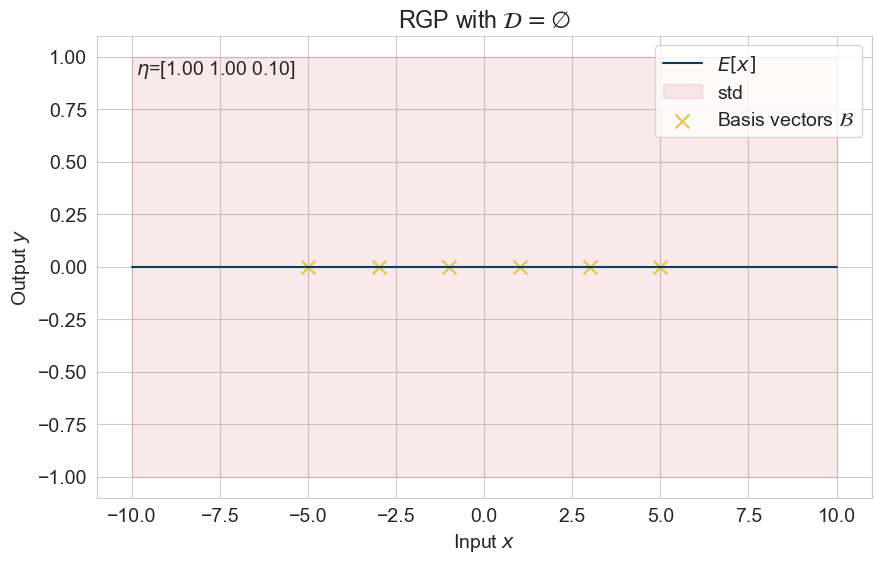

In [64]:
font = {'family' : 'normal',
'size'   : 14}

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rc('font', **font)

plt.style.use('fast')
sns.set_style("whitegrid")

plt.figure(figsize=(10,6), dpi=100)
plt.plot(x_query, mean_prior, color=cs[0], label=r'$E[x]$')
plt.fill_between(x_query.reshape(-1), mean_prior.reshape(-1) - std_prior, mean_prior.reshape(-1) + std_prior,
                    color=cs[1], alpha=0.1, label='std')

plt.scatter(x_basis, y_basis, color=cs[3], label=r'Basis vectors $\mathcal{B}$', marker='x', s=100)

plt.annotate(r'$\eta$=' + str(model_prior.theta), xy=(2, 1), xycoords='data',
            xytext=(0.05, .95), textcoords='axes fraction',
            va='top', ha='left')

plt.xlabel(r'Input $x$')
plt.ylabel(r'Output $y$')
plt.title(r'RGP with $\mathcal{D} = \varnothing$')
plt.legend()
plt.savefig('img/RGP_nodata.pdf', format='pdf')


In [65]:

x_train_half = np.array([-4, -2, 0]).reshape(-1,1)
y_train_half = x_train_half**2


for t in range(len(x_train_half[:,0])):
    model_prior.regress(x_train_half[t,:], y_train_half[t,:])
    

mean_training_half, cov_training_half = model_prior.predict(x_query, cov=True)
std_training_half = np.diag(cov_training_half)



<class 'numpy.ndarray'>
0
1
2


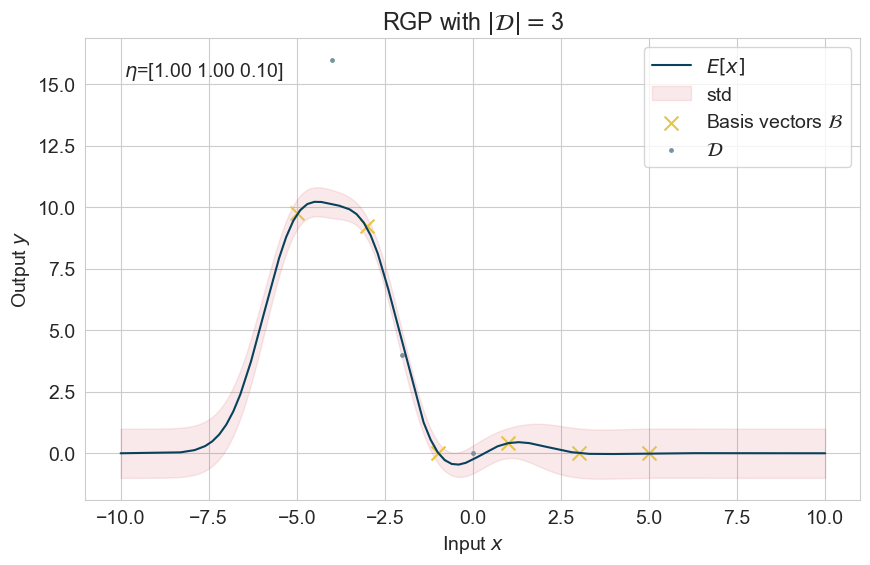

In [66]:
font = {'family' : 'normal',
'size'   : 14}

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rc('font', **font)

plt.style.use('fast')
sns.set_style("whitegrid")

plt.figure(figsize=(10,6), dpi=100)
plt.plot(x_query, mean_training_half, color=cs[0], label=r'$E[x]$')
plt.fill_between(x_query.reshape(-1), mean_training_half.reshape(-1) - std_training_half, mean_training_half.reshape(-1) + std_training_half,
                    color=cs[1], alpha=0.1, label='std')

plt.scatter(model_prior.X, model_prior.mu_g_t, color=cs[3], label=r'Basis vectors $\mathcal{B}$', marker='x', s=100)

plt.scatter(x_train_half, y_train_half, color=cs[2], label=r'$\mathcal{D}$', s=6)


print(type(model_prior.theta))
plt.annotate(r'$\eta$=' + str(model_prior.theta), xy=(2, 1), xycoords='data',
            xytext=(0.05, .95), textcoords='axes fraction',
            va='top', ha='left')

d = []

for i in range(len(x_train_half[:,0])):
    print(i)
    d.append([x_train_half[i,0], y_train_half[i,0]])
dstr = '{' + str(d)[1:-1] + '}'

plt.xlabel(r'Input $x$')
plt.ylabel(r'Output $y$')
plt.title(r'RGP with $\vert \mathcal{D} \vert = $' + str(len(x_train_half[:,0])))
plt.legend()
plt.savefig('img/RGP_regress_data_half.pdf', format='pdf')

In [67]:

x_train = np.array([-4, -2, 0, 3, 5]).reshape(-1,1)
y_train = x_train**2


for t in range(len(x_train[:,0])):
    model_prior.regress(x_train[t,:], y_train[t,:])
    

mean_training_half, cov_training_half = model_prior.predict(x_query, cov=True)
std_training_half = np.diag(cov_training_half)

0
1
2
3
4


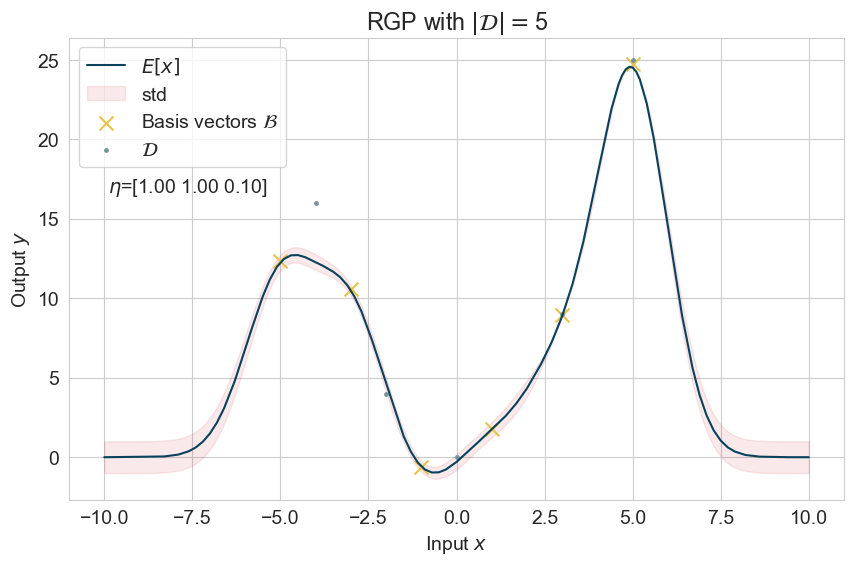

In [74]:
font = {'family' : 'normal',
'size'   : 14}

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rc('font', **font)

plt.style.use('fast')
sns.set_style("whitegrid")

plt.figure(figsize=(10,6), dpi=100)
plt.plot(x_query, mean_training_half, color=cs[0], label=r'$E[x]$')
plt.fill_between(x_query.reshape(-1), mean_training_half.reshape(-1) - std_training_half, mean_training_half.reshape(-1) + std_training_half,
                    color=cs[1], alpha=0.1, label='std')

plt.scatter(model_prior.X, model_prior.mu_g_t, color=cs[3], label=r'Basis vectors $\mathcal{B}$', marker='x', s=100)

plt.scatter(x_train, y_train, color=cs[2], label=r'$\mathcal{D}$', s=6)

plt.annotate(r'$\eta$=' + str(model_prior.theta), xy=(2, 1), xycoords='data',
            xytext=(0.05, .70), textcoords='axes fraction',
            va='top', ha='left')

d = []

for i in range(len(x_train[:,0])):
    print(i)
    d.append([x_train[i,0], y_train[i,0]])
dstr = '{' + str(d)[1:-1] + '}'

plt.xlabel(r'Input $x$')
plt.ylabel(r'Output $y$')
plt.title(r'RGP with $\vert \mathcal{D} \vert = $' + str(len(x_train[:,0])))
plt.legend()
plt.savefig('img/RGP_regress_data_full.pdf', format='pdf')

In [69]:


x_train_lots = np.random.uniform(-6,6,50).reshape(-1,1)
y_train_lots = x_train_lots**2

model_lots = RGP(x_basis, y_basis, theta=theta0)

for t in range(len(x_train_lots[:,0])):
    model_lots.regress(x_train_lots[t,:], y_train_lots[t,:])
    

mean_training_lots, cov_training_lots = model_lots.predict(x_query, cov=True)
std_training_lots = np.diag(cov_training_lots)

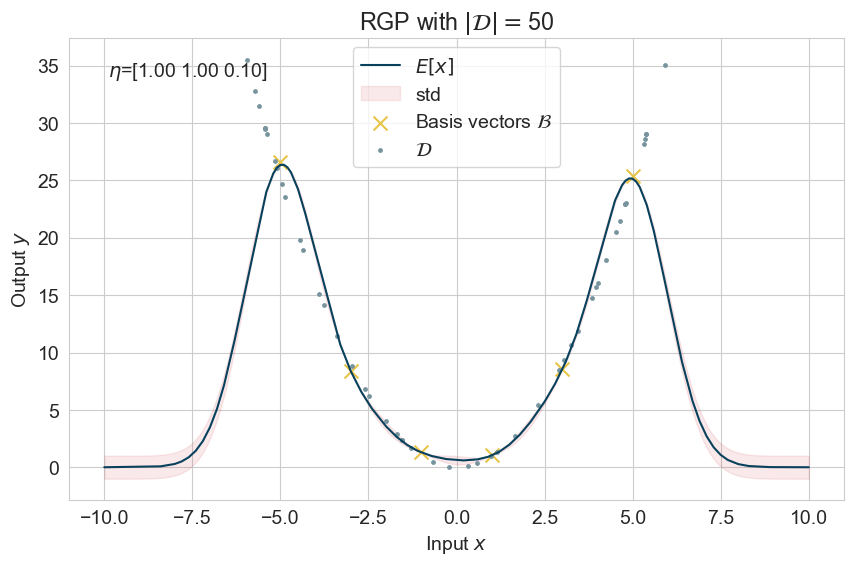

In [70]:
font = {'family' : 'normal',
'size'   : 14}

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rc('font', **font)

plt.style.use('fast')
sns.set_style("whitegrid")

plt.figure(figsize=(10,6), dpi=100)
plt.plot(x_query, mean_training_lots, color=cs[0], label=r'$E[x]$')
plt.fill_between(x_query.reshape(-1), mean_training_lots.reshape(-1) - std_training_lots, mean_training_lots.reshape(-1) + std_training_lots,
                    color=cs[1], alpha=0.1, label='std')

plt.scatter(model_lots.X, model_lots.mu_g_t, color=cs[3], label=r'Basis vectors $\mathcal{B}$', marker='x', s=100)

plt.annotate(r'$\eta$=' + str(model_lots.theta), xy=(2, 1), xycoords='data',
            xytext=(0.05, .95), textcoords='axes fraction',
            va='top', ha='left')

plt.scatter(x_train_lots, y_train_lots, color=cs[2], s=6, label=r'$\mathcal{D}$')
plt.xlabel(r'Input $x$')
plt.ylabel(r'Output $y$')
plt.title(r'RGP with $\vert \mathcal{D} \vert = $' + str(len(x_train_lots[:,0])))
plt.legend()
plt.savefig('img/RGP_regress_data_lots.pdf', format='pdf')




NameError: name 'model_posterior' is not defined

0
1
2
3
4


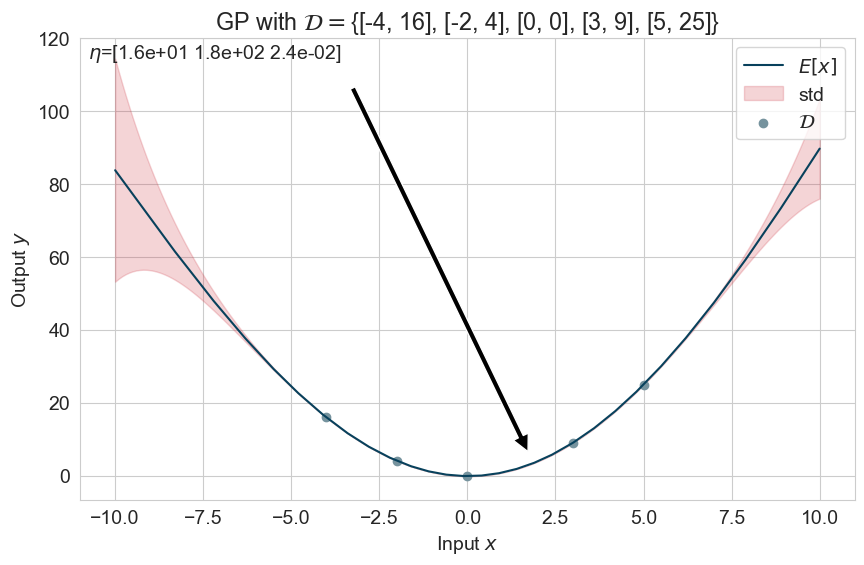

In [ ]:
font = {'family' : 'normal',
'size'   : 14}

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rc('font', **font)

plt.style.use('fast')
sns.set_style("whitegrid")

plt.figure(figsize=(10,6), dpi=100)
plt.plot(x_query, mean_a, color=cs[0], label=r'$E[x]$')
plt.fill_between(x_query.reshape(-1), mean_a.reshape(-1) - std_a, mean_a.reshape(-1) + std_a,
                    color=cs[1], alpha=0.1, label='std')

d = []

for i in range(len(x_train[:,0])):
    print(i)
    d.append([x_train[i,0], y_train[i,0]])

dstr = '{' + str(d)[1:-1] + '}'
title = 'GP with $\mathcal{D} = $' + str(d)
plt.scatter(x_train, y_train, color=cs[2], label=r'$\mathcal{D}$')



plt.annotate(r'$\eta$=' + str(model_posterior.theta), xy=(2, 1), xycoords='data',
            xytext=(0.01, .99), textcoords='axes fraction',
            va='top', ha='left')


plt.xlabel(r'Input $x$')
plt.ylabel(r'Output $y$')
plt.title(r'GP with $\mathcal{D} = $' + dstr)
plt.legend()
plt.savefig('img/GP_data_with_ML.pdf', format='pdf')

ValueError: Format 'jpg' is not supported (supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz)

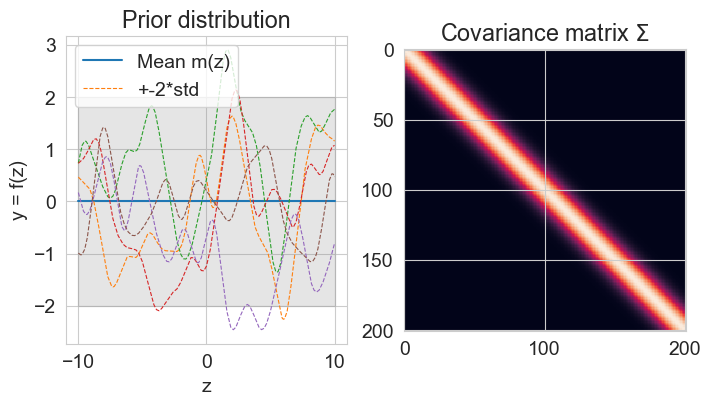

In [ ]:
plt.figure(figsize=(8,4), dpi=100)
plt.subplot(1,2,1)
plt.plot(x_query, mean_prior)
plt.fill_between(x_query.reshape(-1), mean_prior.reshape(-1) - 2*std_prior, mean_prior.reshape(-1) + 2*std_prior, color='gray', alpha=0.2)

for i in range(y_samples_prior.shape[0]):
    plt.plot(x_query, y_samples_prior[i], '--', linewidth=0.8)

plt.xlabel('z')
plt.ylabel('y = f(z)')
plt.legend(('Mean m(z)', '+-2*std'))
plt.title('Prior distribution')

plt.subplot(1,2,2)
plt.title('Covariance matrix $\Sigma$')
plt.imshow(cov_prior)
plt.savefig('img/prior_distribution.pdf', format='pdf')
plt.savefig('docs/prior_distribution.jpg', format='jpg')

plt.figure(figsize=(8,4), dpi=100)
plt.subplot(1,2,1)
plt.plot(x_query, mean_b)
plt.fill_between(x_query.reshape(-1), mean_b.reshape(-1) - 2*std_b, mean_b.reshape(-1) + 2*std_b, color='gray', alpha=0.2)
plt.plot(x_train, y_train, 'x')

for i in range(y_samples_b.shape[0]):
    plt.plot(x_query, y_samples_b[i],'--', linewidth=0.8)
plt.xlabel('z')
plt.ylabel('y = f(z)')
plt.legend(('Mean m(z)', '+-2*std', 'Training samples'))
plt.title('Posterior initial hyperparameters')
plt.subplot(1,2,2)
plt.imshow(cov_b)
plt.title('Covariance matrix $\Sigma$')
plt.savefig('img/posterior_distribution_nofit.pdf', format='pdf')
plt.savefig('docs/posterior_distribution_nofit.jpg', format='jpg')


plt.figure(figsize=(8,4), dpi=100)
plt.subplot(1,2,1)
plt.plot(x_query, mean_a)
plt.fill_between(x_query.reshape(-1), mean_a.reshape(-1) - 2*std_a, mean_a.reshape(-1) + 2*std_a, color='gray', alpha=0.2)
plt.plot(x_train, y_train, 'x')
for i in range(y_samples_a.shape[0]):
    plt.plot(x_query, y_samples_a[i],'--', linewidth=0.8)
    

plt.xlabel('z')
plt.ylabel('y = f(z)')
plt.legend(('Mean m(z)', '+-2*std', 'Training samples'))
plt.title('Posterior after hyperparameter fitting')
plt.subplot(1,2,2)
plt.imshow(cov_a)
plt.title('Covariance matrix $\Sigma$')
plt.savefig('img/posterior_distribution_fit.pdf', format='pdf')
plt.savefig('docs/posterior_distribution_fit.jpg', format='jpg')